In [ ]:
%pip install yfinance
%pip install matplotlib

In [91]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [93]:
def compare_stock_performance(stock1_data, stock2_data, stock1_title, stock2_title):
    """
    Plots the Stock Prices of 2 stocks for comparison.

    Parameters:
        stock1_data (pd.DataFrame): Historical data for the first stock.
        stock2_data (pd.DataFrame): Historical data for the second stock.
        stock1_title (str): Name of the first stock
        stock2_title (str): Name of the second stock
    """

    # Plot Open Prices for both stocks
    plt.figure(figsize=(12, 6))
    
    plt.plot(stock1_data['Date'], stock1_data['Open'], label=stock1_title, color='black', alpha=0.7)
    plt.plot(stock2_data['Date'], stock2_data['Open'], label=stock2_title, color='orange', alpha=0.7)
    
    # Title, labels, and legend
    plt.title(f'{stock1_title} vs {stock2_title} -  Stock Performance post 2010', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Open Price ($)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Display the plot
    plt.show()


## yFinance API to get Stock data

In [94]:
# Loading 1st Stock data using YF API
apple = yf.Ticker('AAPL')
# Loading the share price data
apple_data = apple.history(period="10y")
# Resetting the index
apple_data.reset_index(inplace=True)
# Displaying first 5 rows
apple_data.head()

# Loading 2nd Stock data
amazon = yf.Ticker('AMZN')
# Loading sharep price data
amazon_data = amazon.history(period="10y")
# Resetting index
amazon_data.reset_index(inplace=True)
# Displaying first 5 rows
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-11-17 00:00:00-05:00,16.322001,16.400000,15.9015,16.1525,95698000,0.0,0.0
1,2014-11-18 00:00:00-05:00,16.199499,16.478001,16.1625,16.2465,70990000,0.0,0.0
2,2014-11-19 00:00:00-05:00,16.362499,16.420000,16.2010,16.3270,65632000,0.0,0.0
3,2014-11-20 00:00:00-05:00,16.200001,16.633499,16.1665,16.5270,68734000,0.0,0.0
4,2014-11-21 00:00:00-05:00,16.771000,16.916500,16.5735,16.6315,89332000,0.0,0.0


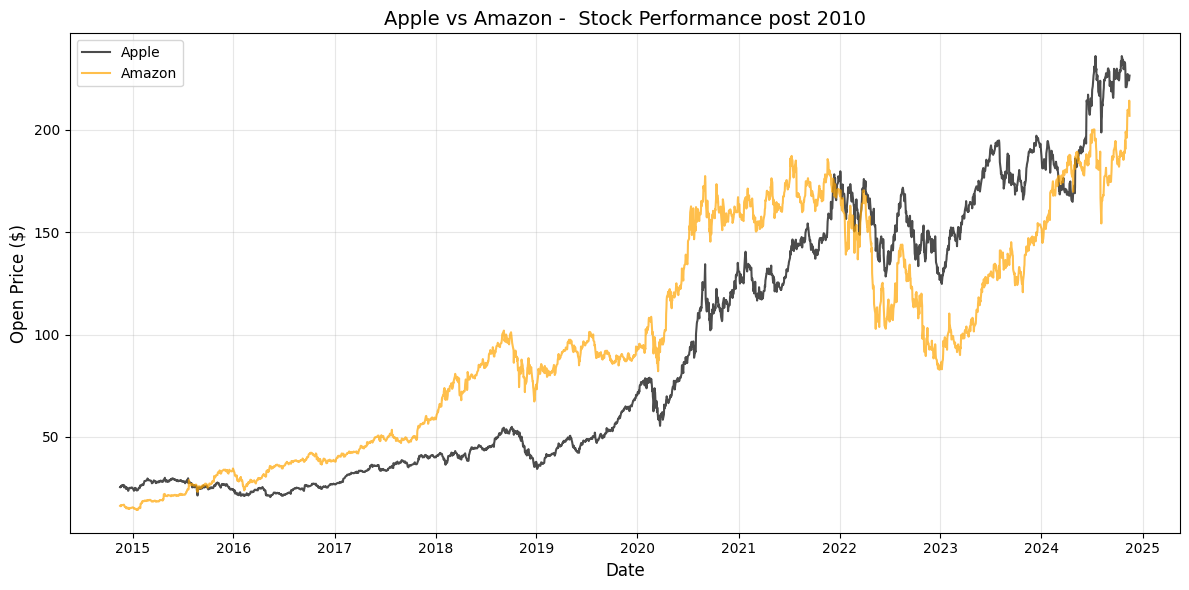

In [95]:
# Plotting Stock Performance
compare_stock_performance(apple_data, amazon_data, 'Apple', 'Amazon')

## HTML Revenue Data

In [ ]:
# Reading revenue data from html
amzn_revenue_data = pd.read_html('https://www.macrotrends.net/stocks/charts/AMZN/amazon/revenue')
# Accessing the 2nd table
amzn_revenue_data = amzn_revenue_data[1]
# Renaming the columns
amzn_revenue_data.columns = ['Date','Revenue']
# Replacing string characters and changing the data type to float
amzn_revenue_data['Revenue']=amzn_revenue_data['Revenue'].replace('[$,]','', regex=True).astype(float)
# Dropping N/A values
amzn_revenue_data.dropna(inplace=True)
# Displaying bottom 5
amzn_revenue_data.tail()